In [1]:
import pandas
import numpy as np
import pandas as pd

#from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns


In [9]:

df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")
df.columns.values



array(['Unnamed: 0', 'AAGE', 'AANCSTR1', 'AANCSTR2', 'AAUGMENT',
       'ABIRTHPL', 'ACITIZEN', 'ACLASS', 'ADEPART', 'ADISABL1',
       'ADISABL2', 'AENGLISH', 'AFERTIL', 'AGE', 'AHISPAN', 'AHOUR89',
       'AHOURS', 'AIMMIGR', 'AINCOME1', 'AINCOME2', 'AINCOME3',
       'AINCOME4', 'AINCOME5', 'AINCOME6', 'AINCOME7', 'AINCOME8',
       'AINDUSTR', 'ALABOR', 'ALANG1', 'ALANG2', 'ALSTWRK', 'AMARITAL',
       'AMEANS', 'AMIGSTAT', 'AMOBLLIM', 'AMOBLTY', 'ANCSTRY1',
       'ANCSTRY2', 'AOCCUP', 'APERCARE', 'APOWST', 'ARACE', 'ARELAT1',
       'ARIDERS', 'ASCHOOL', 'ASERVPER', 'ASEX', 'ATRAVTME', 'AVAIL',
       'AVETS1', 'AWKS89', 'AWORK89', 'AYEARSCH', 'AYRSSERV', 'CITIZEN',
       'CLASS', 'DEPART', 'DISABL1', 'DISABL2', 'ENGLISH', 'FEB55',
       'FERTIL', 'HISPANIC', 'HOUR89', 'HOURS', 'IMMIGR', 'INCOME1',
       'INCOME2', 'INCOME3', 'INCOME4', 'INCOME5', 'INCOME6', 'INCOME7',
       'INCOME8', 'INDUSTRY', 'KOREAN', 'LANG1', 'LANG2', 'LOOKING',
       'MARITAL', 'MAY75880', 'MEANS', '

In [13]:
df_demo = pd.DataFrame()


df_demo["AGE"] = df[["AGE"]].copy()
df_demo["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)

df_demo["YEARSCH"] = df[["YEARSCH"]].copy()
df_demo["ENGLISH"] = df[["ENGLISH"]].copy()
df_demo["FERTIL"] = df[["FERTIL"]].copy()
df_demo["YRSSERV"] = df[["YRSSERV"]].copy()



df_demo = pd.get_dummies(df_demo, columns = ["ENGLISH", "FERTIL" ])


/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Number of clusters: 3
Silhouette Coefficient: 0.264


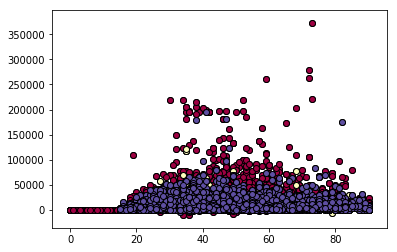

In [14]:

X = df_demo.values[np.random.choice(df_demo.values.shape[0], 10000)]

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_db = sc.fit_transform(X)


n_clusters = 3

labels = KMeans(n_clusters = n_clusters).fit_predict(X_db)




print('Number of clusters: %d' % n_clusters)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_db, labels))

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1],  c = col, edgecolor='k')
